# Breast Cancer Prediction

* dataset - https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

## Table of Content -
- Import Dependencies
-

### *IMPORT DEPENDENCIES*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### *LOAD DATASET*

In [2]:
df = pd.read_csv('Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### *STATISTIAL INFORMATION OF DATASET*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [12]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### *DATA VISUALIZATION AND CLEANING*

In [15]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(4023, 16)

<Axes: xlabel='Status', ylabel='count'>

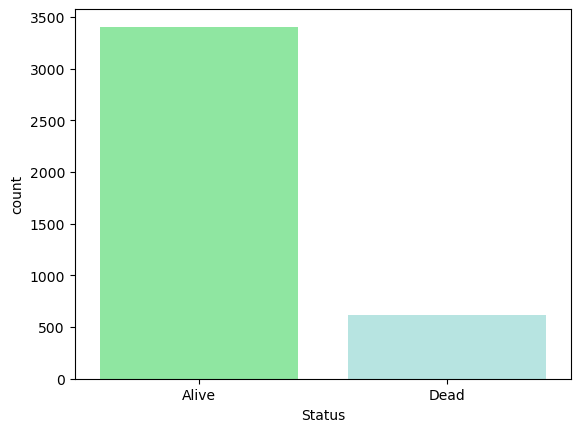

In [9]:
colors = ['#81F499','#AFECE7']
sns.countplot(x=df['Status'], palette=colors)

<Axes: xlabel='Marital Status', ylabel='count'>

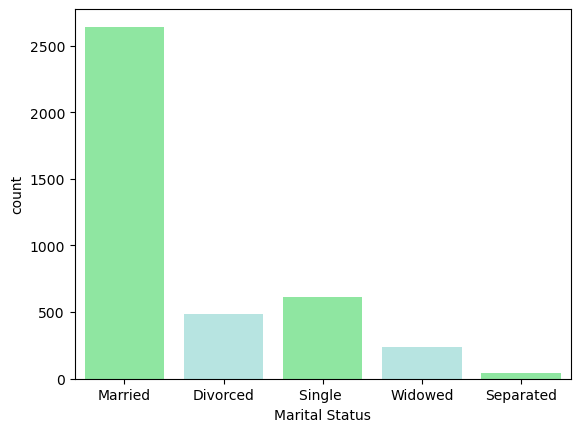

In [10]:
colors = ['#81F499','#AFECE7']
sns.countplot(x=df['Marital Status'], palette=colors)

<Axes: >

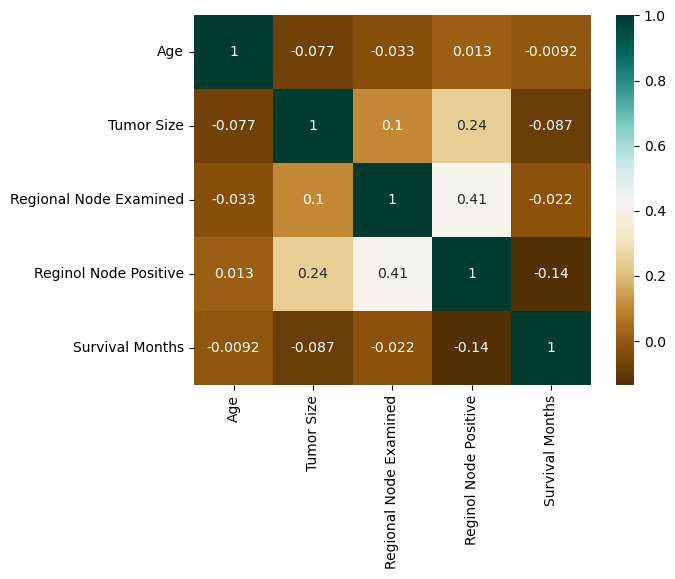

In [11]:
corrmat = df.corr(numeric_only=True)
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
sns.heatmap(corrmat,cmap='BrBG', annot = True)

In [18]:
df.corr(numeric_only=True)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077069,-0.033186,0.012743,-0.009224
Tumor Size,-0.077069,1.000000,0.104258,0.242247,-0.087016
Regional Node Examined,-0.033186,0.104258,1.000000,0.411520,-0.022166
Reginol Node Positive,0.012743,0.242247,0.411520,1.000000,-0.135330
Survival Months,-0.009224,-0.087016,-0.022166,-0.135330,1.000000


### *CATEGORICAL VARIABLES*

### Handling messing values

In [21]:
s = (df.dtypes == 'object')
obj_col = list(s[s].index)
print('Categorical Variables')
print(obj_col)

Categorical Variables
['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [22]:
for i in obj_col:
    print(i, df[i].isnull().sum())

Race 0
Marital Status 0
T Stage  0
N Stage 0
6th Stage 0
differentiate 0
Grade 0
A Stage 0
Estrogen Status 0
Progesterone Status 0
Status 0


In [23]:
n = (df.dtypes == 'int64')
int_col = list(n[n].index)
print('Numric variables:')
print(int_col)

Numric variables:
['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [24]:
for i in int_col:
    print(i, df[i].isnull().sum())

Age 0
Tumor Size 0
Regional Node Examined 0
Reginol Node Positive 0
Survival Months 0


### *DATA PREPROCESING*

### Steps involved in Data Preprocessing:

- Dropping unnecessary colunms
- Label encoding columns with categorical data
- Detecting outliers
- Dropping the outliers based on data analysis


In [19]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### *Label encoding the catagorical varable*

In [25]:
encoder = LabelEncoder()
for i in obj_col:
    df[i] = encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4023 non-null   int64
 1   Race                    4023 non-null   int32
 2   Marital Status          4023 non-null   int32
 3   T Stage                 4023 non-null   int32
 4   N Stage                 4023 non-null   int32
 5   6th Stage               4023 non-null   int32
 6   differentiate           4023 non-null   int32
 7   Grade                   4023 non-null   int32
 8   A Stage                 4023 non-null   int32
 9   Tumor Size              4023 non-null   int64
 10  Estrogen Status         4023 non-null   int32
 11  Progesterone Status     4023 non-null   int32
 12  Regional Node Examined  4023 non-null   int64
 13  Reginol Node Positive   4023 non-null   int64
 14  Survival Months         4023 non-null   int64
 15  Status                  40

In [26]:
df.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
374,39,2,1,1,2,4,0,2,1,24,1,1,26,13,59,0
2999,62,2,1,0,2,4,1,3,1,15,1,0,12,11,23,1
1741,60,1,1,2,2,4,1,3,1,70,1,0,21,11,53,0
1608,62,2,1,0,0,0,0,2,1,18,1,1,18,1,94,0
1991,63,2,1,2,0,2,1,3,1,62,1,1,4,1,88,0
3694,40,2,1,1,0,1,0,2,1,31,1,1,18,3,56,0
905,55,2,1,0,0,0,0,2,1,20,1,1,9,2,69,0
3614,44,1,1,1,0,1,0,2,1,25,1,1,5,3,61,0
3031,63,2,0,1,0,1,3,1,1,22,1,1,16,3,66,0
850,62,0,4,0,0,0,1,3,1,18,1,1,5,1,96,1


### *DETECTING OUTLIERS*

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

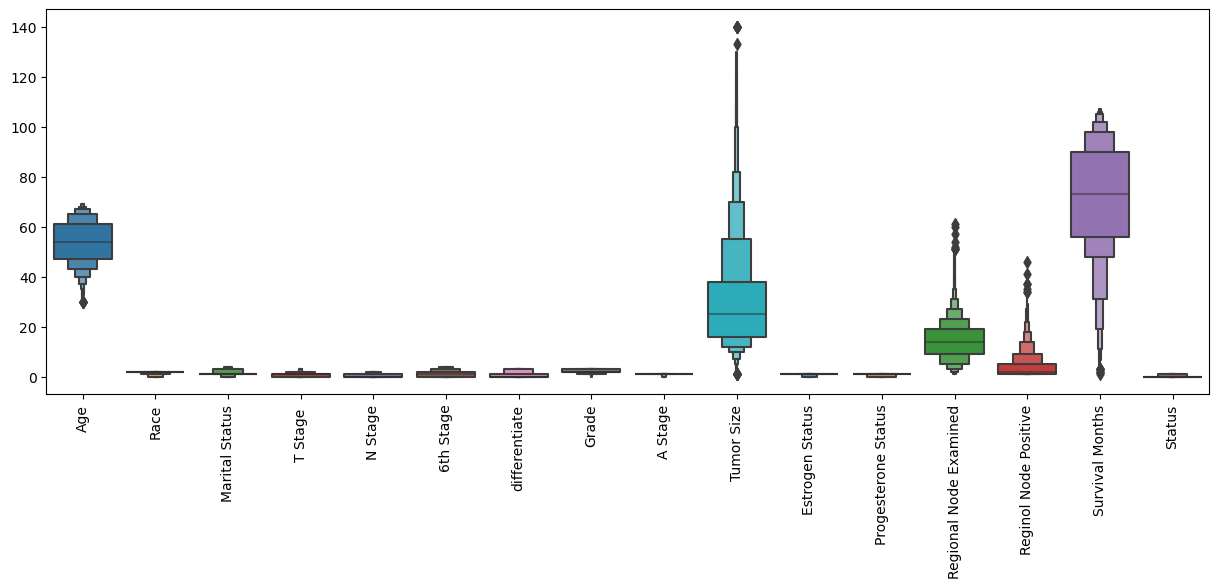

In [20]:
plt.figure(figsize=(15,5))
sns.boxenplot(data = df, palette='tab10')
plt.xticks(rotation=90)
plt.show()

### TRAIN TEST SPLIT DATASET

In [27]:
x = df.drop('Status', axis=1)
y = df['Status']

In [28]:
x.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50


In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=10, test_size=0.2)

In [31]:
xtrain.shape

(3218, 15)

In [32]:
xtest.shape

(805, 15)

### *MODEL BUILDING*

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [27]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30)
svm_model = SVC()
dt_model = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30)
xgboost_model = XGBClassifier(n_jobs=-1,random_state=42)

In [28]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [29]:
svm_model.fit(xtrain, ytrain)

SVC()

In [30]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, random_state=42)

In [31]:
xgboost_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
rf_score = rf_model.score(xtest, ytest)
svc_score = svm_model.score(xtest, ytest)
dt_score = dt_model.score(xtest, ytest)
xgbost_score = xgboost_model.score(xtest, ytest)

In [33]:
print('Random Forest Classifier Score : ', rf_score)
print('Sapport Vector Classifier Score : ', svc_score)
print('Decission Tree Classifier Score : ', dt_score)
print('XG Boost Classifier Score : ', xgbost_score)

Random Forest Classifier Score :  0.9204968944099379
Sapport Vector Classifier Score :  0.8832298136645963
Decission Tree Classifier Score :  0.9105590062111801
XG Boost Classifier Score :  0.9031055900621118


In [37]:
dat = df.head()

In [38]:
dat.to_csv

In [70]:
df1.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [78]:
df1['Reginol Node Positive'].value_counts()

Reginol Node Positive
1     1522
2      740
3      420
4      261
5      207
6      140
7      108
9       90
8       75
10      61
11      56
12      50
14      41
13      33
16      29
15      26
17      26
19      23
22      16
18      15
21      13
26      10
20      10
23       8
24       8
28       7
27       6
29       6
25       3
33       2
37       2
30       2
32       2
34       2
31       1
46       1
35       1
41       1
Name: count, dtype: int64

In [77]:
df.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1212,46,2,1,2,2,4,1,3,1,61,0,0,18,10,10,1
3225,54,2,2,1,2,4,0,2,1,21,1,1,15,13,42,0
1558,58,2,1,2,0,2,0,2,1,60,1,1,6,1,91,0
398,63,1,3,0,1,2,1,3,1,15,0,0,18,8,58,0
3035,57,2,1,1,0,1,0,2,1,33,1,1,9,1,107,0
553,49,2,1,0,1,2,1,3,1,11,1,1,17,4,100,0
1918,60,2,4,0,0,0,3,1,1,14,1,1,23,1,68,0
3150,48,0,3,1,0,1,0,2,1,25,1,1,19,1,88,0
3126,50,2,1,1,0,1,0,2,1,35,1,1,15,1,51,0
2770,38,2,1,1,0,1,0,2,1,23,1,1,16,1,69,0
